# `DSML_WS_05` - Feature Engineering

Please work on the following tasks **before** the fifth workshop session.

## 1. Visualizing the Iris dataset

Last week, we learned how to visualize data using Matplotlib and Seaborn. Let us put what we learned together using a familiar dataset: the iris flower dataset.

Complete the following steps:
1. Read in the `iris.csv` dataset and drop missing data.
2. Create a simple scatter plot of the "number" and "Petal.Width" features. Annotate your graph appropriately.
3. You may have noticed some striking patterns emerging from this first plot. So let's dig deeper. Plot Petal.Width vs. Petal.Length on a scatter plot. Colour-code the different species. Hint: You could run `plt.scatter()` for each species and use different colors to differentiate between the species.
4. Finally, let us plot a histogram - a common plot type in data science - which shows the number of occurences of a given observation in the sample. **Use the Seaborn library for this**. Plot the Petal.Width feature. Hint: Using the `data=`, `x=` and `hue=` parameters of the `sns.histplot()` function can be very helpful here.

In [10]:
# Task 1: your code here
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('iris.csv',sep = ',')

# drop the the columns with missing values
data = data.dropna(axis=0)

# show the first 5 rows of the data
data


,number,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


Text(0.5, 1.0, 'Scatter plot of the data')

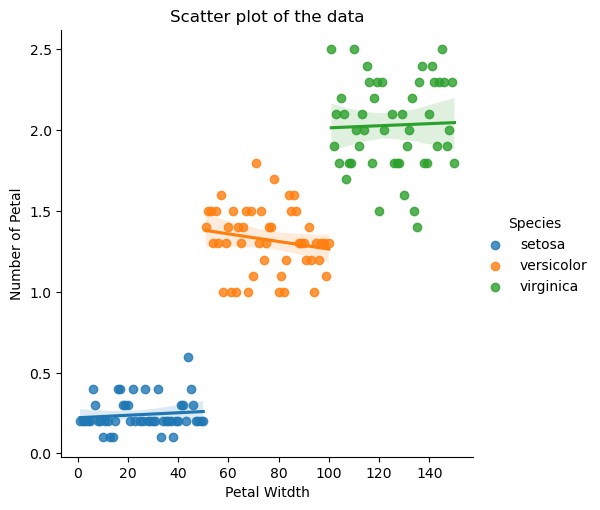

In [19]:
# Task 2: create a scatter plot of the data
fig = sns.lmplot(x="number", y="Petal.Width", data=data, hue="Species", fit_reg=True)
fig.set_axis_labels("Petal Witdth", "Number of Petal")
plt.title('Scatter plot of the data')



Text(0.5, 1.0, 'Scatter plot of the data')

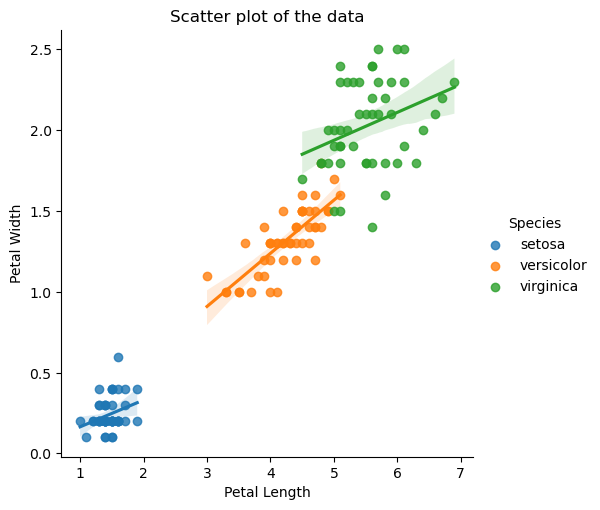

In [17]:
# Task 3: plotting petal lenght and width
fig = sns.lmplot(x="Petal.Length", y="Petal.Width", data=data, hue="Species", fit_reg=True)
fig.set_axis_labels("Petal Length", "Petal Width")
plt.title('Petal Length in relaiton to Petal Width')



/opt/miniconda3/envs/DSML_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/DSML_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/DSML_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/DSML_env/lib/python3.12/site-packages/s

<Axes: xlabel='Petal.Width', ylabel='Count'>

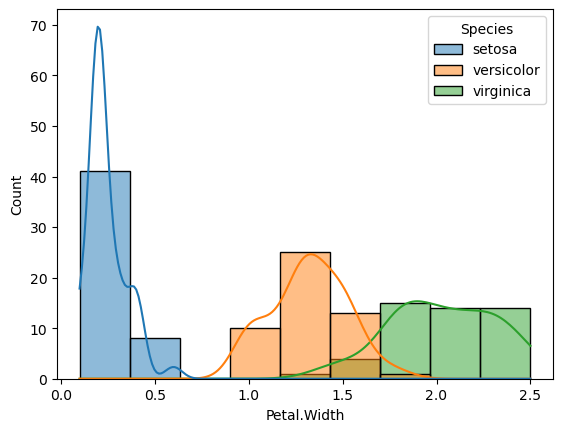

In [22]:
# Task 4: your code here
sns.histplot(x = "Petal.Width",data = data,hue="Species",kde=True)

## 2. Getting started with feature engineering

This week, we will look at what features we can derive from the data we have available. We will use a large carsharing dataset during the workshop.

Among other things, we will work with temporal data. This means that our dataframe contains information like "2017-11-01 00:10:01". Brainstorm features that you could extract from this piece of information and collect them in the list below.

Feature list:
- date
- ...

Let's create a dataframe containing hypothetical date values. Execute the following cell.

In [23]:
import pandas as pd

test_data = pd.DataFrame({"timestamp": ["2024-05-01", "2024-05-02", "2024-05-03", "2024-05-04", "2024-05-05", "2024-05-06", "2024-05-07"]})

test_data

,timestamp
0,2024-05-01
1,2024-05-02
2,2024-05-03
3,2024-05-04
4,2024-05-05
5,2024-05-06
6,2024-05-07


Manually look up the day of the week (Monday, Tuesday, Wednesday,...) for the given dates and add them in a second column called "weekday_manually".

In [25]:
# your code here
test_data["weekday_manually"] = ["Wednesday", "Thursday", "Friday", "Saturday", "Sunday","Monday", "Tuesday"]

test_data


,timestamp,weekday_manually
0,2024-05-01,Wednesday
1,2024-05-02,Thursday
2,2024-05-03,Friday
3,2024-05-04,Saturday
4,2024-05-05,Sunday
5,2024-05-06,Monday
6,2024-05-07,Tuesday


This is, of course, not feasible for large datasets. Luckily, Pandas has extensive built-in functionalities to deal with datetime data. Use `pd.to_datetime(test_data["timestamp"], format="%Y-%m-%d")` to transform the timestamp column into datetime format. Check the data type of timestamp using the .info() method.

In [27]:
# your code here
test_data["timestamp"] = pd.to_datetime(test_data["timestamp"], format='%Y-%m-%d')
test_data

,timestamp,weekday_manually
0,2024-05-01,Wednesday
1,2024-05-02,Thursday
2,2024-05-03,Friday
3,2024-05-04,Saturday
4,2024-05-05,Sunday
5,2024-05-06,Monday
6,2024-05-07,Tuesday


Finally, let's again retrieve the name of the weekday, but this time Python should do the work for us. Simply use the `.dt.day_name()` method on the timestamp feature and save the result to a new column called "weekday_pandas".

In [29]:
# your code here
test_data["weekday_pandas"] = test_data["timestamp"].dt.day_name()
test_data


,timestamp,weekday_manually,weekday_pandas
0,2024-05-01,Wednesday,Wednesday
1,2024-05-02,Thursday,Thursday
2,2024-05-03,Friday,Friday
3,2024-05-04,Saturday,Saturday
4,2024-05-05,Sunday,Sunday
5,2024-05-06,Monday,Monday
6,2024-05-07,Tuesday,Tuesday
